# Reconocimiento de patrones: Clasificación
### Ramón Soto C. [(rsotoc@moviquest.com)](mailto:rsotoc@moviquest.com/)
![ ](images/blank.png)
![agents](images/binary_data_under_a_magnifying.jpg)
[ver en nbviewer](http://nbviewer.ipython.org/github/rsotoc/pattern-recognition/blob/master/Clasificación%20V.ipynb)

## Técnicas de clasificación: Reconocimiento sintáctico


### Reconocimiento estructural de patrones

El **reconocimiento de patrones estructural** hace énfasis en la integración de patrones simples para conformar patrones complejos. En este enfoque, un patrón es descrito mediante una estructura jerárquica de componentes, como en el caso de la estructura sintáctica de los lenguajes formales:

![](images/structural.jpg)<br>

Existen dos formas principales de reconocimiento estructural de patrones: la **estructura de pareo** (*matching structure*) y el **análisis sintáctico**. El método de apareamiento consiste básicamente en *aparear* los elementos a clasificar con *moldes* conocidos. En muchos casos, este método puede expresarse de manera sintáctica. 

![](images/matching.jpg)

El enfoque sintáctico, por su parte, realiza el reconocimiento de patrones a partir de una determinada *sintaxis*, lo que permite utilizar las herramientas de la teoría formal de lenguajes. 

### Gramáticas formales

Una gramática (formal) se define como la tupla

$$G = (N,\Sigma,P,S)$$

donde

* $N$ es un conjunto finito de símbolos  no-terminales (variables a substituir)
* $\Sigma$ es un conjunto finito de símbolos terminales llamado el *alfabeto* o *vocabulario*
* $S\in N$ es el *símbolo inicial*, es decir el símbolo no terminal desde donde se inicia la construcción de una *'frase'*
* $P$ es un conjunto finito de *reglas de producción*, es decir, reglas que definen cómo pueden irse reemplazando los símbolos no-terminales, desde el símbolo inicial, hasta tener una frase terminada.

La forma de las reglas de producción determinan el tipo de gramática y el correspondiente autómata. 

Cada gramática está asociado a un tipo de *autómata* que sería, en realidad, el responsable de reconocer los patrones generables por la gramática correspondiente.

Un lenguaje, es un conjunto de secuencias o cadenas sobre $\Sigma$: $L(G) \subseteq \Sigma^*$. Cuando se aplica la teoría de gramáticas formales al lenguaje natural, el vocabulario es usualmente un conjunto de letras, signos, palabras, morfemas o sonidos.

Los tipos principales de autómata están definidos mediante la jerarquía de Chomsky:

Gramática | Lenguaje | Autómata
-| 
Tipo 0 | Recursivamente enumerable |	Máquina de Turing
Tipo 1 | Dependiente del contexto | Autómata linealmente acotado
Tipo 2 | Independiente del contexto | Autómata de pila
Tipo 3 | Regular | Autómata finito

#### Gramáticas no lingüísticas

Aunque la formulación de gramáticas proviene del contexto lingüístico, es posible desarrollar gramáticas para representar patrones en otros contextos. Consideremos por ejemplo la siguiente gramática regular:

![](images/syntactic_1.png)<br>

En esta gramática, los elementos del alfabeto son segmentos de rectángulos. A partir de las reglas en $P$ podemos construir rectángulos como los siguientes:<br>

![](images/syntactic_2.png)

Dada esta gramática podemos construir un autómata finito capaz de reconocer rectángulos en una imagen. 

Un problema que ha llamado intensamente la atención de la industria es el reconocimiento automático de placas vehiculares. Este es un problema relativamente simple de resolver en ambientes controlados, sin embargo, es un problema complicado cauando deben reconocerse placas de diferentes tipos en un contexto abierto, posiblemente con visibiidad limitada:

![](images/plates.jpg)

Un paso importante en la resolución de este problema es identificar la *estructura* en los componentes de una placa: Una placa de auto es un rectángulo (el símbolo inicial $S$):

![](images/plates_1.jpg)

Pero no cualquier rectángulo "*genera*" una placa:

![](images/plates_2.jpg)



Una etapa posterior incluiría evaluar las posibles producciones a partir del rectángulo, capaces de conducir a la generación de una placa válida:

![](images/plates_3.jpg)

### Procesamiento de lenguaje natural

#### Gramáticas libres de contexto

La ubicación de los lenguajes naturales en la jerarquía de Chomsky (o qué tanto pueden ser representados en ella) es un tema de discusión abierto. El uso de los diferentes tipos de gramáticas para análisis de lenguajes naturales ha sido limitado, siendo las gramáticas más utilizadas las gramáticas libres de contexto.

Considérese la siguiente gramática:

In [1]:
import nltk
from nltk.parse.generate import generate
from nltk import CFG
from IPython.display import Image, display  

grammar = nltk.CFG.fromstring("""
    S -> NP VP
    NP -> Det N | NP PP | N
    VP -> V NP | VP PP | V
    PP -> P NP | P
    Det -> 'el' | 'los' | 'la'
    N -> 'hombre' | 'parque' | 'perro' | 'amigos' | 'cafe' | 'leche'
    V -> 'duerme' | 'mira' | 'toma' | 'camina' | 'toman'
    P -> 'en' | 'con' |'solo'
    """)

parser = nltk.ChartParser(grammar)
print(grammar)

Grammar with 26 productions (start state = S)
    S -> NP VP
    NP -> Det N
    NP -> NP PP
    NP -> N
    VP -> V NP
    VP -> VP PP
    VP -> V
    PP -> P NP
    PP -> P
    Det -> 'el'
    Det -> 'los'
    Det -> 'la'
    N -> 'hombre'
    N -> 'parque'
    N -> 'perro'
    N -> 'amigos'
    N -> 'cafe'
    N -> 'leche'
    V -> 'duerme'
    V -> 'mira'
    V -> 'toma'
    V -> 'camina'
    V -> 'toman'
    P -> 'en'
    P -> 'con'
    P -> 'solo'


Esta gramática permite generar frases como $\textrm{"el perro duerme"}$, cuyo árbol de generación por $G$
es:

Árbol de generación de la cadena "el perro duerme"


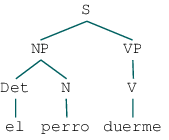

In [4]:
X = "el perro duerme"
print("Árbol de generación de la cadena \"{}\"".format(X))
for tree in parser.parse(X.split()):
    display(tree) # tree.draw() arroja una ventana emergente

o $\textrm{"los amigos toman cafe"}$

Generación de la cadena "los amigos toman cafe"


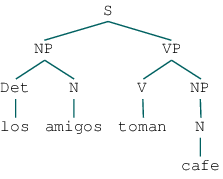

In [5]:
X = "los amigos toman cafe"
print("Generación de la cadena \"{}\"".format(X))
for tree in parser.parse(X.split()):
    display(tree)    

o $\textrm{"el perro duerme en el parque"}$

Generación de la cadena "el perro duerme en el parque"


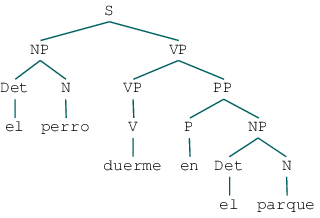

In [6]:
X = "el perro duerme en el parque"
print("Generación de la cadena \"{}\"".format(X))
for tree in parser.parse(X.split()):
    display(tree)    

Y muchas otras frases:

In [7]:
sent_to_print = 30
frases = generate(grammar)

for sentence in generate(grammar, n=sent_to_print):
    print(' '.join(sentence))

el hombre duerme el hombre
el hombre duerme el parque
el hombre duerme el perro
el hombre duerme el amigos
el hombre duerme el cafe
el hombre duerme el leche
el hombre duerme los hombre
el hombre duerme los parque
el hombre duerme los perro
el hombre duerme los amigos
el hombre duerme los cafe
el hombre duerme los leche
el hombre duerme la hombre
el hombre duerme la parque
el hombre duerme la perro
el hombre duerme la amigos
el hombre duerme la cafe
el hombre duerme la leche
el hombre duerme el hombre en el hombre
el hombre duerme el hombre en el parque
el hombre duerme el hombre en el perro
el hombre duerme el hombre en el amigos
el hombre duerme el hombre en el cafe
el hombre duerme el hombre en el leche
el hombre duerme el hombre en los hombre
el hombre duerme el hombre en los parque
el hombre duerme el hombre en los perro
el hombre duerme el hombre en los amigos
el hombre duerme el hombre en los cafe
el hombre duerme el hombre en los leche


Muchas de esta frases, aunque son sintácticamente correctas, no tienen un significado "correcto". 

Las gramáticas libres de contexto (y los correspondientes autómatas finitos / de pila) ofrecen un mecanismo poderoso para la generación (y reconocimiento) de patrones, particularmente útiles en el reconocimiento de patrones en lenguajes, por ejemplo para la implementación de compiladores (específicamente en la etapa de *parsing* o análisis sintáctico).

#### Gramáticas sensibles al contexto

Las gramáticas sensibles al contexto ofrecen una mayor capacidad de discriminación al establecer condiciones de contexto para la aplicación de reglas. Las reglas, en este caso, contienen cadenas en ambos lados, del tipo $\alpha\textrm{A}\beta \to \alpha \gamma \beta$ donde $\textrm{A} \in N$, $\alpha, \beta \in (N \cup \Sigma)^*$ y $\gamma \in (N \cup \Sigma)^+$. En la siguiente versión modificada de nuestra gramática, hemos reemplazado la regla $\textrm{NP} \to \textrm{N}$ por las reglas $\textrm{'la' NP} \to \textrm{NF}$ y $\textrm{'la' NP} \to \textrm{NF}$ y hemos distinguido entre nombres femenino ($\textrm{NF}$) y masculino ($\textrm{NM}$). 

    P = {
        S -> NP VP
        NP -> Det N
        NP -> NP PP
        'la' NP -> NF
        'el' NP -> NM
        VP -> V NP
        VP -> VP PP
        VP -> V
        PP -> P NP
        PP -> P
        Det -> 'el'
        Det -> 'los'
        Det -> 'la'S -> NP VP
        NM -> 'hombre'
        NM -> 'parque'
        NM -> 'perro'
        NM -> 'amigos'
        NM -> 'cafe'
        NF -> 'leche'
        V -> 'duerme'
        V -> 'mira'
        V -> 'toma'
        V -> 'camina'
        V -> 'toman'
        P -> 'en'
        P -> 'con'
        P -> 'solo'
    }
    
Estos cambios evitarían la generación de frases como "el hombre duerme <u>la hombre</u>", "el hombre duerme <u>la parque</u>", "el hombre duerme <u>la perro</u>", "el hombre duerme <u>la cafe</u>" y "el hombre duerme el hombre en <u>el leche</u>". Sin embargo, tratar de reflejar el contexto en frases generadas en un lenguaje natural mediante reglas rebasa la capacidad de las gramáticas convencionales. Considérese el siguiente ejemplo clásico en un diálogo de *Groucho Marx* (*Animal Crackers*, 1930):

> *One morning I shot an elephant in my pajamas. <br>
> How he got in my pajamas, I don't know.* ![](images/groucho.jpg)

Aunque la situación es utilizada como broma, particularmente al ser forzada por Groucho Marx, la estructura es sintácticamente correcta, lo cual es claro si modificamos ligeramente la cita, de la siguiente manera:

> I shot an elephant in my yard.

Una gramática (de juguete) capaz de generar estas frases sería:

In [8]:
groucho_grammar = nltk.CFG.fromstring("""
    S -> NP VP
    PP -> P NP 
    NP -> Det N | Det N PP | 'I'
    VP -> V NP | VP PP 
    Det -> 'an' | 'my'
    N -> 'elephant' | 'pajamas' | 'yard'
    V -> 'shot'
    P -> 'con' | 'in'
    """)

print(groucho_grammar)

Grammar with 15 productions (start state = S)
    S -> NP VP
    PP -> P NP
    NP -> Det N
    NP -> Det N PP
    NP -> 'I'
    VP -> V NP
    VP -> VP PP
    Det -> 'an'
    Det -> 'my'
    N -> 'elephant'
    N -> 'pajamas'
    N -> 'yard'
    V -> 'shot'
    P -> 'con'
    P -> 'in'


Esta gramática genera dos árboles en cada caso. Así para la frase "*I shot an elephant in my yard*", los árboles de generación serían:

![](images/groucho_elephant.png)

El árbol de la izquierda tiene al mismo nivel el verbo ('*shot*') y la preposición ('*in*'); describe la realización de la acción en un sitio "SHOT ... IN...": "*Le disparé a un elefante cuando yo estaba en mi patio*". El árbol de la derecha pone a la misma altura el objeto nominal ('*an elephant*') y a la frase preposicional ('*in my yard*'): "*Le disparé a un elefante que estaba en mi patio*". Ambas frases son sintácticamente y semánticamente correctas.

Los árboles de generación para la frase original, "*I shot an elephant in my pajamas*", son:

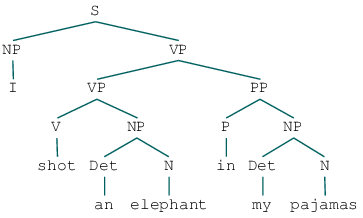

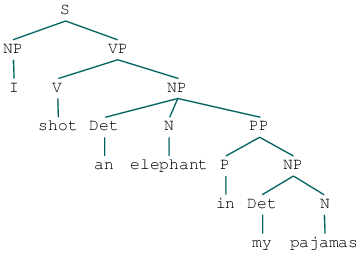

In [9]:
string = "I shot an elephant in my pajamas"

groucho_parser = nltk.ChartParser(groucho_grammar)
for tree in groucho_parser.parse(string.split()):
    display(tree)

En la gramática de prueba, la frase $\textrm{"el hombre con el perro camina en el parque con amigos"}$ también tiene asociados dos árboles de generación:

Generación de la cadena "el hombre camina en el parque con amigos"


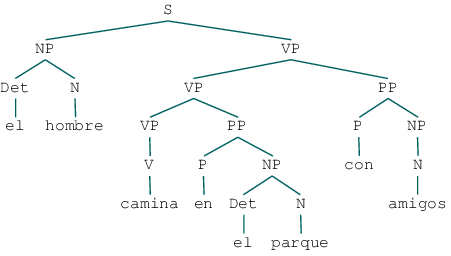

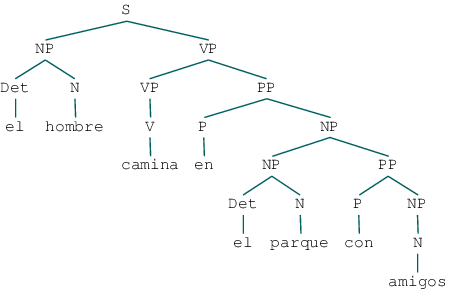

In [2]:
X = "el hombre camina en el parque con amigos"
print("Generación de la cadena \"{}\"".format(X))
for tree in parser.parse(X.split()):
    display(tree)    

Aunque las gramáticas sensibles al contexto ofrecen una manera elegante y natural de extender las gramáticas regulares para tomar en consideración el contexto en una producción, en la práctica son de poca utilidad para lidiar con problemas de lenguaje natural. Entre las limitaciones de las gramáticas sensibles al contexto destaca su complejidad computacional, particularmente su caracter [PSPACE-complete](https://en.wikipedia.org/wiki/PSPACE-complete) (también, es notable la rapidez con que una gramática sensible al contexto se vuelve difícil de describir y la tasa en que aumenta la cantidad de reglas conforme se agregan características del contexto). Por ello, se han propuesto otras formas de gramáticas que, sin poseer el poder de una gramática sensible al contexto, son capaces de describir elementos del contexto en una frase. Destacan entre tales gramáticas las gramáticas probabilísticas.


### Naturaleza probabilística del lenguaje natural

Una característica de los lenguajes naturales es que las frases que los componen no tienen una distribución uniforme. Por el contrario, existen construcciones que son más comunes que otras. De esta manera, aunque las frases $f_1 = \textrm{"el perro camina"}$ y $f_2 = \textrm{"el perro vuela"}$ son ambas correctas sintácticamente, es más probable encontrar la frase $f_1$ que la frase $f_2$ en un texto arbitrario. 

Esta característica estadística es modelada mediante las llamadas "*gramáticas libres de contexto probabilísticas*". Una **Gramática libre de contexto probabilística** (o estocástica) es una **Gramática libre de contexto** cuyas reglas de producción tienen asignadas probabilidades de aplicación, de manera que la suma de probabilidades para todas las reglas que expanden el mismo símbolo no terminal es uno. Considérese la siguiente variante de nuestra gramática ejemplo

![](images/pcfg.png)

Estas reglas generan un lenguaje centrado en el tema de $\textrm{"hombre o perro"}$ en el $\textrm{"parque"}$.

Aunque las gramáticas libres de contexto probabilísticas resultan más adecuadas para generar y reconocer lenguajes naturales que las gramáticas no probabilísticas, aún carecen del poder para capturar las dependencias típicas de los lenguajes naturales. Sin embargo, estas gramáticas ofrecen un avance y nuevas ideas de cómo abordar el problema de identificación del contexto en una frase.

### N-gramas y el enfoque probabilístico

En la película "*Take The Money And Run*", Virgil Starkwell (Woody Allen) intenta asaltar un banco y entrega al cajero una nota con el mensaje "*Please put fifty thousand dollars into this bag and act natural as I am pointing a gun at you*" que es leída por los empleados del banco como "*Please put fifty thousand dollars into this bag and ABT natural as I am pointing a GUB at you*". 

[![](images/i_have_a_gub.jpg)](https://www.youtube.com/watch?v=pEm0zi8QrpA)

Sin embargo, es obvio que la frase "*I am pointing a GUN at you*" es más probable que la frase "*I am pointing a GUB at you*", por lo que en la vida real no nos cuesta trabajo reconocer la frase correcta. Para modelar esta capacidad de predecir la ocurrencia de una palabra en una frase se utilizan **Modelos de lenguajes** que asignan probabilidades a las secuencias de palabras que pueden conformar un texto. 

El modelo más simple es el **Modelo de N-Gramas**". Este modelo asume que la probabiliad de ocurrencia de una palabra está determinada por las palabras recientes; lo que se conoce como la **suposición de Markov**. De manera que para el cálculo de estas probabilidades basta contabilizar la ocurrencia de secuencias de palabras de longitud definida. Un **$N$-Grama** es una secuencia de $N$ palabras. Así, por ejemplo, un 2-grama (o bigrama) es una secuencia de 2 palabras, como "*el hombre*", "*hombre camina*", "*camina en*", "*en el*", "*el parque*". Un 3-grama (trigrama) es una secuencia de tres palabras, como "*el hombre camina*", "*hombre camina en*", "*camina en el*", "*en el parque*". 

In [11]:
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter

text = "los amigos toman cafe. el perro duerme en el parque. el hombre con el perro \
camina en el parque con amigos."

token = nltk.word_tokenize(text)
bigrams = ngrams(token,2)
trigrams = ngrams(token,3)
fourgrams = ngrams(token,4)
fivegrams = ngrams(token,5)

bigrams_list = list(bigrams)
counter_bigrams = Counter(bigrams_list)

print (bigrams_list)
print (counter_bigrams)

[('los', 'amigos'), ('amigos', 'toman'), ('toman', 'cafe'), ('cafe', '.'), ('.', 'el'), ('el', 'perro'), ('perro', 'duerme'), ('duerme', 'en'), ('en', 'el'), ('el', 'parque'), ('parque', '.'), ('.', 'el'), ('el', 'hombre'), ('hombre', 'con'), ('con', 'el'), ('el', 'perro'), ('perro', 'camina'), ('camina', 'en'), ('en', 'el'), ('el', 'parque'), ('parque', 'con'), ('con', 'amigos'), ('amigos', '.')]
Counter({('.', 'el'): 2, ('el', 'perro'): 2, ('en', 'el'): 2, ('el', 'parque'): 2, ('los', 'amigos'): 1, ('amigos', 'toman'): 1, ('toman', 'cafe'): 1, ('cafe', '.'): 1, ('perro', 'duerme'): 1, ('duerme', 'en'): 1, ('parque', '.'): 1, ('el', 'hombre'): 1, ('hombre', 'con'): 1, ('con', 'el'): 1, ('perro', 'camina'): 1, ('camina', 'en'): 1, ('parque', 'con'): 1, ('con', 'amigos'): 1, ('amigos', '.'): 1})


A continuación calculamos los bi-gramas para la colección de revisiones de películas, 1) utilizando los textos completos (<code>movies_reviews["bigrams"]</code>) y 2) eliminando las palabras vacías (<code>movies_reviews["bigrams_sw"]</code>).

In [12]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup
import os
import re
from IPython.display import display, HTML

os.chdir('Data sets/Movies Reviews')
movies_reviews = pd.read_csv("labeledTrainData.tsv", sep='\t')

# Limpiar los documentos. Conservar sólo plabras (alfabéticas) y pasar a minúsculas
movies_reviews.review = list(map(lambda row: re.sub("[^a-zA-Z]", " ", 
                                BeautifulSoup(row, "lxml").get_text().lower()), 
                                 movies_reviews.review))

# Agregar una columna con la conversión de mensajes a listas de palabras
# Se eliminan las palabras vacías
stops = set(stopwords.words("english"))                  

movies_reviews["words"] = list(map(lambda row: [w for w in row.split() if not w in stops], 
                                   movies_reviews.review))

movies_reviews["bigrams"] = list(map(lambda row: list(ngrams(word_tokenize(row),2)), 
                                   movies_reviews.review))

movies_reviews["bigrams_sw"] = list(map(lambda row: list(ngrams(row,2)), 
                                   movies_reviews.words))


display(movies_reviews.head())

,id,sentiment,review,words,bigrams,bigrams_sw
0,5814_8,1,with all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,...","[(with, all), (all, this), (this, stuff), (stu...","[(stuff, going), (going, moment), (moment, mj)..."
1,2381_9,1,the classic war of the worlds by timothy hi...,"[classic, war, worlds, timothy, hines, enterta...","[(the, classic), (classic, war), (war, of), (o...","[(classic, war), (war, worlds), (worlds, timot..."
2,7759_3,0,the film starts with a manager nicholas bell ...,"[film, starts, manager, nicholas, bell, giving...","[(the, film), (film, starts), (starts, with), ...","[(film, starts), (starts, manager), (manager, ..."
3,3630_4,0,it must be assumed that those who praised this...,"[must, assumed, praised, film, greatest, filme...","[(it, must), (must, be), (be, assumed), (assum...","[(must, assumed), (assumed, praised), (praised..."
4,9495_8,1,superbly trashy and wondrously unpretentious ...,"[superbly, trashy, wondrously, unpretentious, ...","[(superbly, trashy), (trashy, and), (and, wond...","[(superbly, trashy), (trashy, wondrously), (wo..."


In [13]:
# Generar un arreglo con los valores de clasificación
Sentiments = np.array([int(x) for x in movies_reviews.sentiment])

A continuación, creamos una "Bolsa de palabras" con las palabras más frecuentes (limitamos la bolsa a las 4000 palabras más frecuentes) y mantenemos la frecuencia de cada palabra en la bolsa.

In [14]:
# Construcción de la Bolsa de palabras. Se seleccionan las 4000 palabras más frecuentes
all_words = nltk.FreqDist(w.lower() for wl in movies_reviews.words for w in wl)
print("50 palabras más populares:\n", all_words.most_common(50))

50 palabras más populares:
 [('movie', 44031), ('film', 40147), ('one', 26788), ('like', 20274), ('good', 15140), ('time', 12724), ('even', 12646), ('would', 12436), ('story', 11983), ('really', 11736), ('see', 11475), ('well', 10662), ('much', 9765), ('get', 9310), ('bad', 9301), ('people', 9285), ('also', 9156), ('first', 9061), ('great', 9058), ('made', 8362), ('way', 8026), ('make', 8023), ('could', 7922), ('movies', 7663), ('think', 7296), ('characters', 7154), ('character', 7023), ('watch', 6973), ('two', 6906), ('films', 6887), ('seen', 6679), ('many', 6675), ('life', 6628), ('plot', 6585), ('acting', 6490), ('never', 6484), ('love', 6454), ('little', 6435), ('best', 6416), ('show', 6295), ('know', 6166), ('ever', 5995), ('man', 5982), ('better', 5737), ('end', 5648), ('still', 5623), ('say', 5395), ('scene', 5378), ('scenes', 5207), ('go', 5157)]


De manera semejante, construimos "Bolsas de ngramas" con dos elecciones: 1) bigramas en el texto completo y 2) bigramas en el texto sin palabras vacías:

In [15]:
# Construcción de la Bolsa de bigramas globales.
all_bigrams = nltk.FreqDist(w for wl in movies_reviews.bigrams for w in wl)
print("50 elementos más populares en la Bolsa de bigramas en texto completo:\n", 
      all_bigrams.most_common(50))

# Construcción de la Bolsa de bigramas, eliminando previamente las palabras vacías.
all_bigrams_sw = nltk.FreqDist(w for wl in movies_reviews.bigrams_sw for w in wl)
print("\n50 elementos más populares en la Bolsa de bigramas sin palabras vacías:\n", 
      all_bigrams_sw.most_common(50))

50 elementos más populares en la Bolsa de bigramas en texto completo:
 [(('of', 'the'), 39208), (('in', 'the'), 25352), (('it', 's'), 17274), (('this', 'movie'), 15721), (('the', 'film'), 13574), (('and', 'the'), 13347), (('is', 'a'), 13129), (('to', 'the'), 12011), (('the', 'movie'), 11892), (('to', 'be'), 11878), (('this', 'film'), 10933), (('it', 'is'), 10128), (('this', 'is'), 9470), (('on', 'the'), 9012), (('in', 'a'), 8918), (('it', 'was'), 8534), (('don', 't'), 8505), (('one', 'of'), 8092), (('for', 'the'), 8017), (('with', 'the'), 7899), (('of', 'a'), 7840), (('is', 'the'), 7007), (('if', 'you'), 6899), (('as', 'a'), 6859), (('at', 'the'), 6830), (('from', 'the'), 6196), (('in', 'this'), 6195), (('with', 'a'), 6078), (('as', 'the'), 5933), (('the', 'story'), 5361), (('i', 'was'), 5341), (('and', 'i'), 5313), (('that', 'the'), 5222), (('to', 'see'), 5166), (('out', 'of'), 5144), (('by', 'the'), 4877), (('i', 'm'), 4794), (('movie', 'is'), 4658), (('the', 'first'), 4625), (('was'

A continuación descartamos las frecuencias de palabras y bigramas (no se requieren):

In [16]:
word_features = [ w for (w,f) in all_words.most_common(4000)]

bigrams_features = [ w for (w,f) in all_bigrams.most_common(4000)]

bigrams_sw_features = [ w for (w,f) in all_bigrams_sw.most_common(4000)]

Estas bolsas constituyen el prototipo del vector de características:

![ ](images/bag-of-words-bernoulli.png)

## Clasificación mediante bolsa de palabras/ngramas

Todos los textos, en este caso de revisiones de películas, serán codificados mediante vectores basados en este prototipo. 

Posteriormente utilizaremos estos vectores de características para clasificar las revisiones mediante un clasificador bayesiano ingenuo con modelo de Bernoulli:

In [18]:
#Regresa el vector de características de un documento
def document_features(document, global_features): 
    document_words = set(document) 
    features = []
    for word in global_features:
        if (word in document_words) :
            features.append(1)
        else :
            features.append(0)
    return features

# Vectores de características de la colección de documentos
featuresets_words = [
    document_features(d, word_features) for d in movies_reviews["words"]]
featuresets_bigrams = [
    document_features(d, bigrams_features) for d in movies_reviews["bigrams"]]
featuresets_bigrams_sw = [
    document_features(d, bigrams_sw_features) for d in movies_reviews["bigrams_sw"]]

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

# Dividir datos en dos conjuntos: entrenamiento y prueba
words_train, words_test, wy_train, wy_test = train_test_split(
    featuresets_words, Sentiments, test_size=0.2)

# Entrenamiento de un clasificador Bernouilli Bayes ingenuo
#clfB = BernoulliNB(alpha=1.0, class_prior=None, fit_prior=False)
clfBw = BernoulliNB()
clfBw.fit(words_train, wy_train)

# Pruebas del clasificador
predictions_train_words = clfBw.predict(words_train)
fails_train_words = np.sum(wy_train != predictions_train_words)
print("Puntos mal clasificados en el conjunto de entrenamiento: {} de {} ({}%)\n"
      .format(fails_train_words, len(words_train), 100*fails_train_words/len(words_train)))
predictions_test_words = clfBw.predict(words_test)
fails_test_words = np.sum(wy_test != predictions_test_words)
print("Puntos mal clasificados en el conjunto de prueba: {} de {} ({}%)\n"
      .format(fails_test_words, len(words_test), 100*fails_test_words/len(words_test)))

Puntos mal clasificados en el conjunto de entrenamiento: 2771 de 20000 (13.855%)

Puntos mal clasificados en el conjunto de prueba: 717 de 5000 (14.34%)



A continuación realizamos la clasificación de revisiones de películas utilizando como base la bolsa de bigramas de texto completo:

In [20]:
bigrams_train, bigrams_test, biy_train, biy_test = train_test_split(
    featuresets_bigrams, Sentiments, test_size=0.2)

# Entrenamiento de un clasificador Bernouilli Bayes ingenuo
#clfB = BernoulliNB(alpha=1.0, class_prior=None, fit_prior=False)
clfBbi = BernoulliNB()
clfBbi.fit(bigrams_train, biy_train)

# Pruebas del clasificador
predictions_train_bigrams = clfBbi.predict(bigrams_train)
fails_train_bigrams = np.sum(biy_train != predictions_train_bigrams)
print("Puntos mal clasificados en el conjunto de entrenamiento: {} de {} ({}%)\n"
      .format(fails_train_bigrams, len(bigrams_train), 
              100*fails_train_bigrams/len(bigrams_train)))
predictions_test_bigrams = clfBbi.predict(bigrams_test)
fails_test_bigrams = np.sum(biy_test != predictions_test_bigrams)
print("Puntos mal clasificados en el conjunto de prueba: {} de {} ({}%)\n"
      .format(fails_test_bigrams, len(bigrams_test), 
              100*fails_test_bigrams/len(bigrams_test)))

Puntos mal clasificados en el conjunto de entrenamiento: 3354 de 20000 (16.77%)

Puntos mal clasificados en el conjunto de prueba: 920 de 5000 (18.4%)



Y finalmente, la clasificación de los mismos datos utilizando la bolsa de bigramas sin palabras vacías:

In [21]:
# Dividir datos en dos conjuntos: entrenamiento y prueba
bigrams_sw_train, bigrams_sw_test, biswy_train, biswy_test = train_test_split(
    featuresets_bigrams_sw, Sentiments, test_size=0.2)

# Entrenamiento de un clasificador Bernouilli Bayes ingenuo
#clfB = BernoulliNB(alpha=1.0, class_prior=None, fit_prior=False)
clfBbisw = BernoulliNB()
clfBbisw.fit(bigrams_sw_train, biswy_train)

# Pruebas del clasificador
predictions_train_bigrams_sw = clfBbisw.predict(bigrams_sw_train)
fails_train_bigrams_sw = np.sum(biswy_train != predictions_train_bigrams_sw)
print("Puntos mal clasificados en el conjunto de entrenamiento: {} de {} ({}%)\n"
      .format(fails_train_bigrams_sw, len(bigrams_sw_train), 100*fails_train_bigrams_sw/len(bigrams_sw_train)))
predictions_test_bigrams_sw = clfBbisw.predict(bigrams_sw_test)
fails_test_bigrams_sw = np.sum(biswy_test != predictions_test_bigrams_sw)
print("Puntos mal clasificados en el conjunto de prueba: {} de {} ({}%)\n"
      .format(fails_test_bigrams_sw, len(bigrams_sw_test), 100*fails_test_bigrams_sw/len(bigrams_sw_test)))

Puntos mal clasificados en el conjunto de entrenamiento: 3349 de 20000 (16.745%)

Puntos mal clasificados en el conjunto de prueba: 986 de 5000 (19.72%)



Los resultados no son alentadores: el uso de bigramas utilizando texto completo son peores que los obtenidos con palabras individuales y los resultados obtenidos al eliminar las palabras vacías es aún peor. Este resultado contradictorio puede explicarse al analizar los vectores de características resultantes. 

Recordemos que los vectores de características con las elecciones que hemos hecho tienen una longitud de 4000. Dado que estamos empleando una distribución de Bernoulli, el vector de características presenta un 1 si la palabra correspondiente está presente en el texto y un 0 en caso contrario. A continuación presentamos el promedio de atributos presentes en cada vector de características en la colección de revisiones de películas, utilizando palabras, bigramas en texto completo (B1) y bigramas sin considerar palabras vacías (B2), presentes en la colección de vectores: 

In [35]:
print("Promedio de atributos utilizando palabras: ", int(sum(x > 0 for x in featuresets_words[i] 
          for i in range(len(featuresets_words)))/len(featuresets_words)))
print("Promedio de atributos utilizando bigramas tipo B1: ", int(sum(x > 0 for x in featuresets_bigrams[i] 
          for i in range(len(featuresets_bigrams)))/len(featuresets_bigrams)))
print("Promedio de atributos utilizando bigramas tipo B2: ", int(sum(x > 0 for x in featuresets_bigrams_sw[i] 
          for i in range(len(featuresets_bigrams_sw)))/len(featuresets_bigrams_sw)))

Promedio de atributos utilizando palabras:  40
Promedio de atributos utilizando bigramas tipo B1:  45
Promedio de atributos utilizando bigramas tipo B2:  7


El éxito del aprendizaje automático consiste en encontrar suficientes ejemplos de una misma clase que compartan suficienres características para poder identificar el patrón que identifica a la clase:

![](images/classes.jpg)

Sin embargo, de acuerdo con los resultados en el conteo de atributos utilizados por las revisiones de películas, cada vector de características basado en palabras utiliza en promedio sólo el 1% de posibles atributos; La probabilidad de que diferentes vectores compartan suficientes atributos como para poder generalizar los modelos de clase, es muy baja. 

Los vectores de características basados en bigramas tipo B1 (sin eliminar palabras vacías) utilizan ligeramente más atributos, pero la inclusión de palabras vacías parece reducir la capacidad de aprendizaje (toda vez que las palabras vacías típicamente no aportan capacidad discriminante).

Al eliminar las palabras vacías, se espera incluir sólo palabras altamente discriminantes, sin embargo, ahora el promedio de atributos utilizados se reduce a un 0.17%.

En este problema, dada la baja probabilidad de coincidencias, se requieren más ejemplos para poder generalizar un modelo.

Otra estrategia útil es crear una bolsa de palabras vacías propia, adecuada al contexto, en lugar de utilizar una bolsa de palabras vacías general. A continuación presentamos un análisis de palabras más frecuentes en la colección de revisiones de películas.

In [36]:
movies_reviews = pd.read_csv("labeledTrainData.tsv", sep='\t')

# Limpiar los documentos. Conservar sólo plabras (alfabéticas) y pasar a minúsculas
movies_reviews.review = list(map(lambda row: re.sub("[^a-zA-Z]", " ", 
                                BeautifulSoup(row, "lxml").get_text().lower()), 
                                 movies_reviews.review))

# Agregar una columna con la conversión de mensajes a listas de palabras
# Sin eliminar las palabras vacías
movies_reviews["words"] = list(map(lambda row: row.split(), movies_reviews.review))

most_common_words = nltk.FreqDist(w for wl in movies_reviews.words for w in wl)
print("50 palabras más populares:\n", most_common_words.most_common(50))

30 palabras más populares:
 [('the', 336653), ('and', 164113), ('a', 163138), ('of', 145855), ('to', 135705), ('is', 107318), ('it', 96445), ('in', 93960), ('i', 87645), ('this', 75968), ('that', 73276), ('s', 66086), ('was', 48198), ('as', 46937), ('for', 44335), ('with', 44121), ('movie', 44031), ('but', 42615), ('film', 40147), ('t', 34402), ('you', 34261), ('on', 34202), ('not', 30629), ('he', 30144), ('are', 29432), ('his', 29369), ('have', 27726), ('be', 26953), ('one', 26788), ('all', 23976)]


'movie' es la primera palabra de interés y tiene una frecuencia de 44031... sin embargo, después de esta palabra y de 'film' con 40147 apariciones, aparecen otras palabras que pueden calificarse como vacías. El trabajo de depurar una bolsa de palabras vaciías, así como de construir una bolsa de palabras o n-gramas puede requerir de mucho esfuerzo. 
